In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad

1.

Valor exacto (metodo quad): 1.5920977079
Trapecio con n = 100: 1.5922489762
Error: 1.51e-04
Simpson con n = 100: 1.5920977675
Error: 5.96e-08


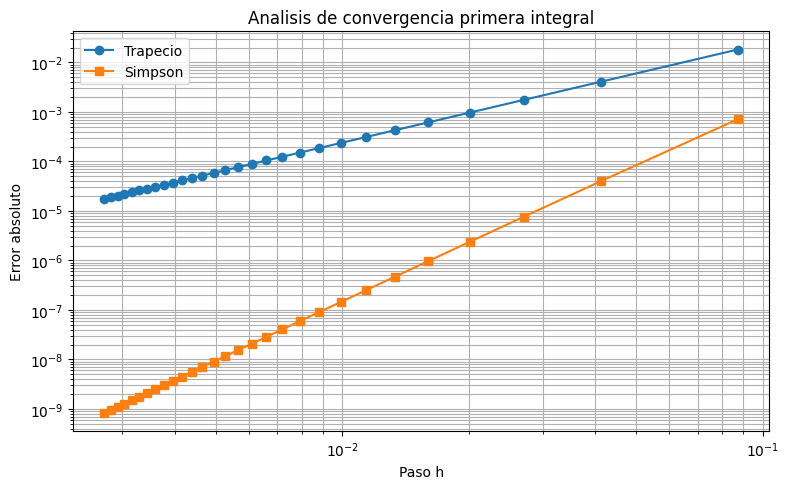

Evaluación con fixed_quad:
  Grado  2 | Resultado: 1.5687508629 | Error: 2.33e-02
  Grado  4 | Resultado: 1.5920973834 | Error: 3.25e-07
  Grado  6 | Resultado: 1.5920977079 | Error: 2.44e-11
  Grado  8 | Resultado: 1.5920977079 | Error: 8.88e-16
  Grado 10 | Resultado: 1.5920977079 | Error: 1.78e-15
  Grado 20 | Resultado: 1.5920977079 | Error: 1.33e-15


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid, simpson, quad, fixed_quad

#Definicion de la función y límites
funcion = lambda x: np.exp(3 * x) * np.sin(x)
limite_inf, limite_sup = 0, np.pi / 4

#Calculo del valor exacto con quad
valor_referencia, _ = quad(funcion, limite_inf, limite_sup)
print(f"Valor exacto (metodo quad): {valor_referencia:.10f}")

#Evaluación con n fijo (n = 100)
n_puntos = 100
x_vals = np.linspace(limite_inf, limite_sup, n_puntos)
y_vals = funcion(x_vals)

aprox_trap = trapezoid(y_vals, x_vals)
aprox_simp = simpson(y_vals, x_vals)

print(f"Trapecio con n = {n_puntos}: {aprox_trap:.10f}")
print(f"Error: {abs(aprox_trap - valor_referencia):.2e}")

print(f"Simpson con n = {n_puntos}: {aprox_simp:.10f}")
print(f"Error: {abs(aprox_simp - valor_referencia):.2e}")

#Estudio de convergencia
pasos_h = []
errores_trap = []
errores_simp = []

for puntos in range(10, 300, 10):
    x_tmp = np.linspace(limite_inf, limite_sup, puntos)
    y_tmp = funcion(x_tmp)
    h_actual = (limite_sup - limite_inf) / (puntos - 1)

    pasos_h.append(h_actual)
    errores_trap.append(abs(trapezoid(y_tmp, x_tmp) - valor_referencia))
    errores_simp.append(abs(simpson(y_tmp, x_tmp) - valor_referencia))

#Grafica log-log del error
plt.figure(figsize=(8, 5))
plt.loglog(pasos_h, errores_trap, 'o-', label='Trapecio')
plt.loglog(pasos_h, errores_simp, 's-', label='Simpson')
plt.xlabel('Paso h')
plt.ylabel('Error absoluto')
plt.title('Analisis de convergencia primera integral')
plt.grid(True, which='both')
plt.legend()
plt.tight_layout()
plt.show()

#Cuadratura de Gauss (fixed_quad)
print("Evaluación con fixed_quad:")
for grado in [2, 4, 6, 8, 10, 20]:
    resultado_gauss, _ = fixed_quad(funcion, limite_inf, limite_sup, n=grado)
    error_gauss = abs(resultado_gauss - valor_referencia)
    print(f"  Grado {grado:2d} | Resultado: {resultado_gauss:.10f} | Error: {error_gauss:.2e}")



Valor exacto (quad) para segunda integral: 0.2725138805
Trapecio con n = 100: 0.2725153570
Error: 1.48e-06
Simpson con n = 100: 0.2725138805
Error: 1.05e-11


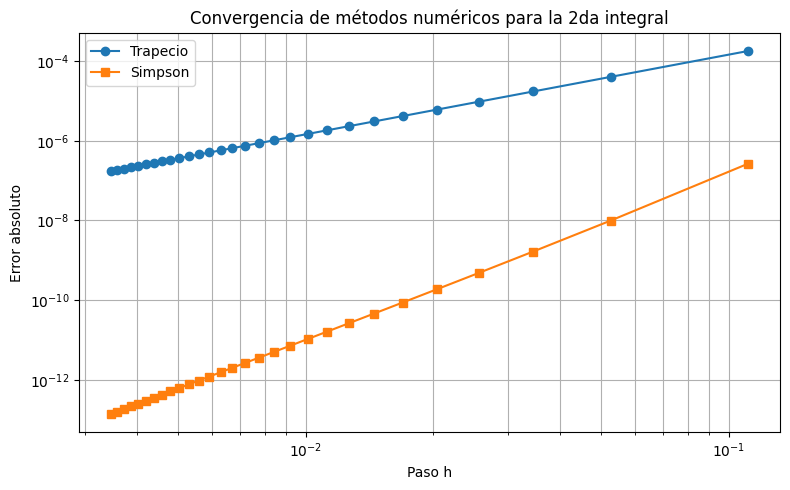

Evaluación con fixed_quad (segunda integral):
  Grado  2 | Resultado: 0.2724108727 | Error: 1.03e-04
  Grado  4 | Resultado: 0.2725138612 | Error: 1.93e-08
  Grado  6 | Resultado: 0.2725138805 | Error: 3.37e-12
  Grado  8 | Resultado: 0.2725138805 | Error: 5.55e-16
  Grado 10 | Resultado: 0.2725138805 | Error: 5.55e-17
  Grado 20 | Resultado: 0.2725138805 | Error: 0.00e+00


In [3]:
#Segunda función a integrar
f_log = lambda x: 1 / (x * np.log(x))
lim_inf, lim_sup = np.e, np.e + 1

#Calculo de la integral exacta con quad
valor_real, _ = quad(f_log, lim_inf, lim_sup)
print(f"\nValor exacto (quad) para segunda integral: {valor_real:.10f}")

# Aproximaciones con n = 100
num_puntos = 100
x_vals2 = np.linspace(lim_inf, lim_sup, num_puntos)
y_vals2 = f_log(x_vals2)

res_trap = trapezoid(y_vals2, x_vals2)
res_simp = simpson(y_vals2, x_vals2)

print(f"Trapecio con n = {num_puntos}: {res_trap:.10f}")
print(f"Error: {abs(res_trap - valor_real):.2e}")

print(f"Simpson con n = {num_puntos}: {res_simp:.10f}")
print(f"Error: {abs(res_simp - valor_real):.2e}")

#Estudio de convergencia
pasos_h2 = []
errores_trap2 = []
errores_simp2 = []

for puntos in range(10, 300, 10):
    x_temp = np.linspace(lim_inf, lim_sup, puntos)
    y_temp = f_log(x_temp)
    h_temp = (lim_sup - lim_inf) / (puntos - 1)

    pasos_h2.append(h_temp)
    errores_trap2.append(abs(trapezoid(y_temp, x_temp) - valor_real))
    errores_simp2.append(abs(simpson(y_temp, x_temp) - valor_real))

#Grafica de convergencia
plt.figure(figsize=(8, 5))
plt.loglog(pasos_h2, errores_trap2, 'o-', label='Trapecio')
plt.loglog(pasos_h2, errores_simp2, 's-', label='Simpson')
plt.xlabel('Paso h')
plt.ylabel('Error absoluto')
plt.title('Convergencia de métodos numéricos para la 2da integral')
plt.grid(True, which='both')
plt.legend()
plt.tight_layout()
plt.show()

#Metodo de cuadratura Gaussiana (fixed_quad)
print("Evaluación con fixed_quad (segunda integral):")
for grado in [2, 4, 6, 8, 10, 20]:
    resultado_gauss2, _ = fixed_quad(f_log, lim_inf, lim_sup, n=grado)
    error_gauss2 = abs(resultado_gauss2 - valor_real)
    print(f"  Grado {grado:2d} | Resultado: {resultado_gauss2:.10f} | Error: {error_gauss2:.2e}")


2.

In [5]:
import numpy as np
from scipy.integrate import tplquad, quad

# Metodo 1: tplquad
f_tplquad = lambda z, y, x: (1 / y) * np.sin(z / y) if y != 0 else 0

resultado_tplquad, error_tplquad = tplquad(
    f_tplquad,
    0, np.pi,                       # x va de 0 a pi
    lambda x: 0, lambda x: x,       # y va de 0 a x
    lambda x, y: 0, lambda x, y: x * y  # z va de 0 a x*y
)

# Metodo 2: usando quad anidado
def integral_mas_interna(y, x):
    if y == 0:
        return 0  # evitar division por cero
    integrando = lambda z: (1 / y) * np.sin(z / y)
    resultado, _ = quad(integrando, 0, x * y)
    return resultado

def integral_intermedia(x):
    integrando = lambda y: integral_mas_interna(y, x)
    resultado, _ = quad(integrando, 0, x)
    return resultado

resultado_quad_anidado, error_quad_anidado = quad(integral_intermedia, 0, np.pi)

#Resultado
print(f"Resultado con tplquad:       {resultado_tplquad:.10f}, Error: {error_tplquad:.1e}")
print(f"Resultado con quad anidado:  {resultado_quad_anidado:.10f}, Error: {error_quad_anidado:.1e}")


Resultado con tplquad:       6.9348022005, Error: 7.7e-14
Resultado con quad anidado:  6.9348022005, Error: 7.7e-14


3.

In [6]:
import numpy as np
from scipy.special import roots_legendre

def gauss_quad(funcion, a, b, n):
    """
    Aproxima la integral definida de una función en el intervalo [a, b]
    utilizando cuadratura de Gauss-Legendre con n puntos.

    Parámetros:
    - funcion: función a integrar
    - a, b: límites del intervalo
    - n: número de puntos de cuadratura

    Retorna:
    - Aproximación numérica de la integral
    """
    nodos, pesos = roots_legendre(n)
    x_mapeado = 0.5 * (b - a) * nodos + 0.5 * (a + b)
    return 0.5 * (b - a) * np.sum(pesos * funcion(x_mapeado))

#Integral mas interna: respecto a z, con limites de 0 a x*y
def integrar_z(y, x, n):
    if y == 0:
        return 0.0
    f_z = lambda z: (1 / y) * np.sin(z / y)
    return gauss_quad(f_z, 0, x * y, n)

# Integral intermedia: respecto a y, con limites de 0 a x
def integrar_y(x, n):
    f_y = lambda y: integrar_z(y, x, n)
    return gauss_quad(np.vectorize(f_y), 0, x, n)

# Integral externa: respecto a x, con limites de 0 a pi
n_puntos = 10
resultado_final = gauss_quad(np.vectorize(lambda x: integrar_y(x, n_puntos)), 0, np.pi, n_puntos)

print(f"Resultado de la integral triple (n={n_puntos}): {resultado_final:.10f}")


Resultado de la integral triple (n=10): 6.9348022005


4.

In [7]:
import numpy as np
from scipy.integrate import quad, fixed_quad, trapezoid, simpson

#Tolerancia pedida
epsilon = 1e-5

#Funcion 1 - integral 1

f1 = lambda x: np.sqrt(np.tan(x))
a1, b1 = np.pi / 20, 1

# Cuadratura adaptativa (valor de referencia)
I1_quad, _ = quad(f1, a1, b1, epsabs=epsilon)

# Aproximaciones con n grande
n1 = 5000
x1 = np.linspace(a1, b1, n1)
y1 = f1(x1)

I1_trap = trapezoid(y1, x1)
I1_simp = simpson(y1, x1)
I1_fixed_gauss, _ = fixed_quad(f1, a1, b1, n=20)

print(f"integral 1")
print(f"  Trapecio     : {I1_trap:.8f}   | Error: {abs(I1_trap - I1_quad):.2e}")
print(f"  Simpson      : {I1_simp:.8f}   | Error: {abs(I1_simp - I1_quad):.2e}")
print(f"  Gaussiana    : {I1_fixed_gauss:.8f}   | Error: {abs(I1_fixed_gauss - I1_quad):.2e}")
print(f"  Referencia   : {I1_quad:.8f}")

#Funcion 2 - integral 2

f2 = lambda x: np.cos(x) / x**3

# Cuadratura adaptativa
I2_quad, _ = quad(f2, 1, np.inf, epsabs=epsilon)

# Aproximación sobre [1, 50]
a2, b2 = 1, 50
x2 = np.linspace(a2, b2, 5000)
y2 = f2(x2)

I2_trap = trapezoid(y2, x2)
I2_simp = simpson(y2, x2)
I2_fixed_gauss, _ = fixed_quad(f2, a2, b2, n=40)

print(f"Integral 2")
print(f"  Trapecio     : {I2_trap:.8f}   | Error: {abs(I2_trap - I2_quad):.2e}")
print(f"  Simpson      : {I2_simp:.8f}   | Error: {abs(I2_simp - I2_quad):.2e}")
print(f"  Gaussiana    : {I2_fixed_gauss:.8f}   | Error: {abs(I2_fixed_gauss - I2_quad):.2e}")
print(f"  Referencia   : {I2_quad:.8f}")

#Funcion 3-integral 3

# Integral interna: depende de x
def integrando_doble(x):
    g = lambda y: np.sqrt(1 - y**2)
    y0, y1 = 0, np.sin(x)
    resultado, _ = quad(g, y0, y1, epsabs=epsilon)
    return resultado

a3, b3 = 0, np.pi / 4

# Cuadratura adaptativa total
I3_quad, _ = quad(integrando_doble, a3, b3, epsabs=epsilon)

# Discretizacion
x3 = np.linspace(a3, b3, 1000)
y3 = np.array([integrando_doble(xi) for xi in x3])

I3_trap = trapezoid(y3, x3)
I3_simp = simpson(y3, x3)
I3_fixed_gauss, _ = fixed_quad(np.vectorize(integrando_doble), a3, b3, n=20)

print(f"Integral 3")
print(f"  Trapecio     : {I3_trap:.8f}   | Error: {abs(I3_trap - I3_quad):.2e}")
print(f"  Simpson      : {I3_simp:.8f}   | Error: {abs(I3_simp - I3_quad):.2e}")
print(f"  Gaussiana    : {I3_fixed_gauss:.8f}   | Error: {abs(I3_fixed_gauss - I3_quad):.2e}")
print(f"  Referencia   : {I3_quad:.8f}")


integral 1
  Trapecio     : 0.68572087   | Error: 2.00e-10
  Simpson      : 0.68572087   | Error: 4.44e-16
  Gaussiana    : 0.68572087   | Error: 1.11e-16
  Referencia   : 0.68572087
Integral 2
  Trapecio     : 0.01813479   | Error: 1.74e-05
  Simpson      : 0.01811508   | Error: 2.34e-06
  Gaussiana    : 0.01811503   | Error: 2.38e-06
  Referencia   : 0.01811741
Integral 3
  Trapecio     : 0.27921254   | Error: 2.58e-08
  Simpson      : 0.27921257   | Error: 4.22e-15
  Gaussiana    : 0.27921257   | Error: 1.11e-16
  Referencia   : 0.27921257
